## LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [2]:
# num_words 빈도수가 높은 단어만 출력하도록
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# 글자 수 500개로 고정
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [4]:
model = models.Sequential()

model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(55))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [5]:
print(len(X_train))

25000


In [6]:
print(len(X_test))

25000


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=40, epochs=100, 
                   validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 44s 88ms/step - loss: 0.4111 - accuracy: 0.7950 - val_loss: 0.3143 - val_accuracy: 0.8813
Epoch 2/100
469/469 [==============================] - 40s 86ms/step - loss: 0.2388 - accuracy: 0.9069 - val_loss: 0.2566 - val_accuracy: 0.8926
Epoch 3/100
469/469 [==============================] - 40s 86ms/step - loss: 0.1850 - accuracy: 0.9306 - val_loss: 0.2977 - val_accuracy: 0.8787
Epoch 4/100
469/469 [==============================] - 42s 89ms/step - loss: 0.1432 - accuracy: 0.9496 - val_loss: 0.2965 - val_accuracy: 0.8864
Epoch 5/100
469/469 [==============================] - 40s 85ms/step - loss: 0.1179 - accuracy: 0.9585 - val_loss: 0.3169 - val_accuracy: 0.8802


In [8]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 12s 15ms/step - loss: 0.3381 - accuracy: 0.8695
Test Accuracy: 0.8695


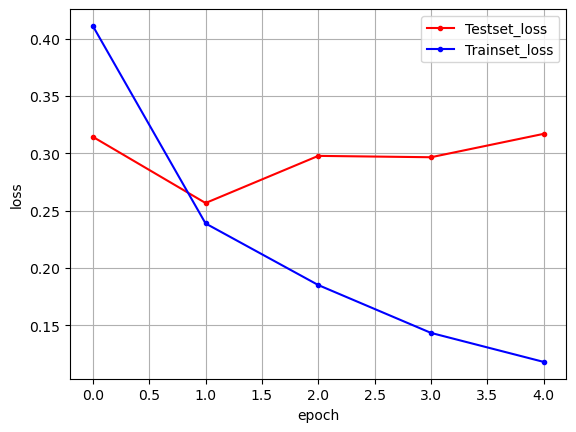

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()